# Аналитика для фонда "Shut Up and Take My Money"

- Автор: Потапов Роман
- Дата: 3.09.2025

### Цели и задачи проекта

 - Цель проекта: Провести исследовательский анализ рынка общественного питания Москвы
 - Задачи проекта: 
         1. Категоризация объектов.

            - Классифицировать представленные в dataset объекты по типам заведений (кафе, ресторан, бар и пр.).
            - Рассчитать и визуализировать (столбчатая диаграмма) распределение количества объектов по каждой категории для оценки структуры рынка.

         2. Географический анализ.

            - Определить перечень административных районов Москвы, представленных в данных.
            - Проанализировать и визуализировать (картограмма или диаграмма рассеяния) распределение общего количества заведений по районам.
            - Выполнить отдельный анализ распределения категорий заведений в пределах Центрального административного округа (ЦАО) для выявления специфики центра города.

         3. Анализ сетевого присутствия.

            - Рассчитать общее соотношение сетевых и несетевых заведений по всему dataset.
            - Исследовать распространенность сетевого формата в разрезе каждой категории заведений для определения наиболее «индустриализированных» сегментов рынка. Результаты представить в виде сгруппированных столчатых диаграмм.

         4. Анализ вместимости (посадочных мест).

            - Исследовать распределение признака seats (количество мест) на предмет наличия аномалий и выбросов с использованием описательной статистики и box-plot диаграмм по категориям.
            - Для каждой категории определить наиболее типичное (медианное) количество посадочных мест.

         5. Анализ рейтингов.

            - Сравнить усреднённые показатели рейтингов для различных категорий заведений. Визуализировать распределение средних рейтингов (например, с помощью violin-plot или box-plot) для наглядного сравнения.

         6. Корреляционный анализ.

            - Построить и проанализировать матрицу корреляций для оценки силы связи между рейтингом заведения и другими параметрами (категория, район, сетевой статус, количество мест, ценовая категория, круглосуточный режим работы).
            - Выявить параметр с наиболее сильной связью и детально проверить выявленную зависимость.

         7. Выявление ключевых сетей.

            - Сгруппировать данные по наименованиям для идентификации сетевых объектов.
            - Определить топ-15 сетей по количеству заведений в Москве (популярность).
            - Для полученного списка сетей рассчитать средний рейтинг и определить их predominant категорию. Результаты визуализировать.

         8. Анализ ценового позиционирования.

            - Исследовать вариацию показателя middle_avg_bill (средний чек) в зависимости от административного района.
            - Сравнить уровень цен в ЦАО с другими округами для формулирования выводов о влиянии центральной локации на ценовую политику заведений. Использовать подходящие визуализации (например, box-plot по районам).

### Описание данных

  Для анализа поступили данные о клиентах банка «Метанпром». Данные состоят из двух датасетов:

- `/datasets/rest_info.csv` — содержит информацию о заведениях общественного питания;
- `/datasets/rest_price.csv` —  содержит информацию о среднем чеке в заведениях общественного питания.

### Содержимое проекта

- 1. Загрузка данных и знакомство с ними
- 2. Предобработка данных
    - Приведение данных к корректному типу
    - Работа с пропусками
    - Работа с дубликатами
- 3. Исследовательский анализ данных
- 4. Итоговые выводы
---

## 1. Загрузка данных и знакомство с ними

- Загружаем данные

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
!pip install phik

     |████████████████████████████████| 677 kB 2.8 MB/s eta 0:00:01


In [5]:
import phik
from phik import report

In [6]:
rest_info = pd.read_csv('/datasets/rest_info.csv')

In [7]:
rest_price = pd.read_csv('/datasets/rest_price.csv')

In [8]:
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [9]:
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [10]:
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [11]:
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


---

### Промежуточный вывод


Рассмотрим датафрейм rest_info:
   - Столбец 'seats' разумнее привести к типу данных 'int64', так как столбец, содержащий данные о количестве посадочных мест не может содержать нецелочисленных значений
   - Пропуски содержаться только в столбцах 'hours' и 'seats'. Если в первом случае количество пропусков от общего количества строк невелико и их можно удалить, то во втором случае количество пропусков значительно и требует отдельного анализа на предмет возникновения.

Рассмотрим датафрейм rest_price:
   - Во всех столбцах приведены корректные типы данных
   - Пропуски содержаться только в столбце 'middle_coffee_cup' и их количество значительно, поэтому столбец требует дополнительной обработки 

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [12]:
df = pd.merge(rest_info, rest_price, on = 'id', how = 'left')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [14]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

Приведем столбец 'seats' к корректному типу данных

In [15]:
df['seats'] = pd.to_numeric(df['seats'], errors='coerce')

In [16]:
missing_data = pd.DataFrame({
    'Кол-во пропусков': df.isnull().sum(),
    'Доля пропусков, %': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data.sort_values('Кол-во пропусков', ascending=False)

,Кол-во пропусков,"Доля пропусков, %"
middle_coffee_cup,7871,93.64
middle_avg_bill,5257,62.54
price,5091,60.56
avg_bill,4590,54.60
seats,3611,42.96
hours,536,6.38
id,0,0.00
name,0,0.00
category,0,0.00
address,0,0.00


Проанализируем пропуски в датасете:
   - Наибольшее количество пропусков в столбце middle_coffee_cup, в процентном соотношении их больше 93 процентов от общего числа строк. Причина появления пропусков заключается в том, что столбец заполняется только когда значение в столбце avg_bill начинается с "Цена одной чашки капучино". Следовательно, в остальных случаях в этом столбце будет пропуск. Поэтому это пропуск типа MNAR. Так как этот столбец не участвует в анализе, с пропусками можно ничего не делать.
   - Пропуски в middle_avg_bill	в процентном соотношении составляют более 62 процентов от общего числа строк, что существенно. Причина появления пропусков: значения заполняются только если в avg_bill есть строка, начинающаяся с "Средний счёт". Тип пропуска - MNAR. Корректно заполнить эти пропуски не удастся, так как это повлияет на матрицу корреляции, поэтому оставим пропуски как есть.
   - Пропуски в столбце price составляют более 60 процентов. Возможная причина: категория цен заполняется, вероятно, вручную или на основе анализа avg_bill. Следовательно, это тип пропусков MAR. Пропуски невозможно заполнить корректно из-за их количества, поэтому оставим их.
   - Пропуски в стоблце avg_bill составляют более 54 процентов. Тип пропусков - MAR, так как наблюдается систематическое присутствие пропусков. Возможная причина - заведения не сознательно не делятся своей ценовой политикой либо же она слишком сложная.Здесь пропуски также не поддаются обработке, поэтому оставим их.
   - Пропуски в столбце seats составляют более 42 процентов, тип пропусков - MAR, так как вероятность пропуска зависит от категории заведения. Заведепия с выносным форматом подачи блюд реже указывают количество посадочных мест. Аналогичная ситуация, с пропусками ничего не делаем.
   - Пропуски в столбце hours составляют чуть более 6 процентов. Тип пропусков - MCAR. Вероятно, пропуски появились в результате технического сбоя. Так как количество пропусков невелико - их иожно проигнорировать.

Проверяем данные на явные и неявные дубликаты

In [17]:
df[df.duplicated(keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


In [18]:
df_clean = df.copy()
df_clean['name_normalized'] = df_clean['name'].str.lower().str.strip()
df_clean['address_normalized'] = df_clean['address'].str.lower().str.strip()


duplicates = df_clean[df_clean.duplicated(
    subset=['name_normalized', 'address_normalized'], 
    keep=False  # помечает все дубликаты, не только первые
)]


duplicates.sort_values(
    ['name_normalized', 'address_normalized']
).groupby(['name_normalized', 'address_normalized'])
display(duplicates)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,name_normalized,address_normalized
189,072032ce16dc47bfbc63b672c75bd371,Кафе,кафе,"Москва, парк Ангарские Пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN,кафе,"москва, парк ангарские пруды"
215,897ddbc6746c4388b19dc8a9fcdbb488,Кафе,кафе,"Москва, парк Ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN,кафе,"москва, парк ангарские пруды"
1430,62608690e9cc464fbcd980cfd552e334,More poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN,more poke,"москва, волоколамское шоссе, 11, стр. 2"
1511,a69f018d5c064873a3b491b0121bc1b4,More Poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN,more poke,"москва, волоколамское шоссе, 11, стр. 2"
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,Раковарня Клешни и Хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN,раковарня клешни и хвосты,"москва, проспект мира, 118"
2420,aba1de7ad7d64ac0a3f8684bda29d905,Раковарня Клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN,раковарня клешни и хвосты,"москва, проспект мира, 118"
3091,3c2a73ea79a04be48858fab3685f2f37,Хлеб да Выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN,хлеб да выпечка,"москва, ярцевская улица, 19"
3109,d3116844e4e048f99614eb30be3214e0,Хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN,хлеб да выпечка,"москва, ярцевская улица, 19"


In [19]:
print(f"Найдено {len(duplicates)} потенциальных дубликатов")

Найдено 8 потенциальных дубликатов


In [20]:
# 1. ЯВНЫЕ дубликаты (полное совпадение всех столбцов)
duplicates_full = df[df.duplicated(keep=False)]
print(f"Явных дубликатов (полное совпадение): {len(duplicates_full)} записей")

# 2. НЕЯВНЫЕ дубликаты (совпадение по названию и адресу)
df['name_clean'] = df['name'].str.lower().str.strip()
df['address_clean'] = df['address'].str.lower().str.strip()

duplicates_partial = df[df.duplicated(['name_clean', 'address_clean'], keep=False)]
print(f"Неявных дубликатов (название+адрес): {len(duplicates_partial)} записей")

# УДАЛЕНИЕ ДУБЛИКАТОВ
initial_count = len(df)

# Удаляем все типы дубликатов
df = df.drop_duplicates()  # явные дубликаты
df = df.drop_duplicates(subset=['name_clean', 'address_clean'], keep='first')  # неявные

# Удаляем временные столбцы
df.drop(['name_clean', 'address_clean'], axis=1)

Явных дубликатов (полное совпадение): 0 записей
Неявных дубликатов (название+адрес): 8 записей


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


 - Создаем столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [21]:
def is_24_7(x):
    if pd.isna(x):
        return False
    if 'ежедневно' in x and 'круглосуточно' in x:
        return True
    elif 'ежедневно' in x and ('00:00' in x and '24:00' in x):
        return True
    else: 
        return False


#Применим функцию к столбцу
df['is_24_7'] = df['hours'].apply(is_24_7)

---

### Промежуточный вывод

Столбцы были приведены к корректному типу данных, также заменены на подходящие значения пропуски:
   - Количество строк до обработки: 8406
   - Количество строк после обработки: 8406

Обработаны пропуски:
 - middle_coffee_cup (93.6% пропусков) - сохранены как есть, так как данные отсутствуют систематически у заведений без кофейного меню

 - middle_avg_bill (62.5% пропусков) - сохранены как есть, так как заполняются только при наличии фразы "Средний счёт"

 - seats (43% пропусков) - оставлены как есть

Остальные пропуски проанализированы и задокументированы

Удалены дубликаты:
 - Проверены и удалены явные дубликаты (полное совпадение строк)

 - Проверены и удалены неявные дубликаты (совпадение по названию и адресу)

 - Сохранены первые уникальные записи

Результат:
 - Данные полностью подготовлены для исследовательского анализа. Учтена природа пропусков (MNAR, MAR, MCAR), удалены все дубликаты, сохранена целостность dataset.

## 3. Исследовательский анализ данных


---

### Задача 1

Исследуем количество объектов общественного питания по каждой категории

In [22]:
category_stats = df['category'].value_counts().reset_index()
category_stats.columns = ['category', 'count']
category_stats['proportion'] = (category_stats['count'] / len(df)).round(6)

# Красивое отображение таблицы
print("Распределение заведений по категориям:")
print(category_stats.to_string(index=False))

Распределение заведений по категориям:
       category  count  proportion
           кафе   2376    0.282790
       ресторан   2042    0.243037
        кофейня   1413    0.168174
        бар,паб    764    0.090931
       пиццерия    633    0.075339
быстрое питание    603    0.071769
       столовая    315    0.037491
       булочная    256    0.030469


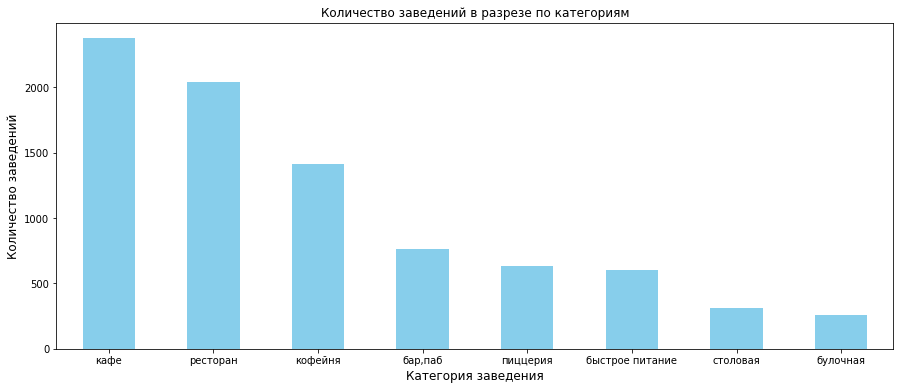

In [23]:
category_count = df.groupby('category')['id'].agg('count').sort_values(ascending=False)
category_count.plot(kind = 'bar',
        title = 'Количество заведений в разрезе по категориям',
        xlabel = 'category',
        ylabel = 'category_count',
        rot = 0,
        figsize = (15, 6),
        color = 'skyblue',
        legend = False
)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.show()

Из полученного графика можем сделать вывод, что наибольшее количество заведений находится в категории "кафе". При этом меньше всего заведений находится в категории "булочная".

---

### Задача 2

Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы

In [24]:
district_stats = df['district'].value_counts().reset_index()
district_stats.columns = ['district', 'count']
district_stats['proportion'] = (district_stats['count'] / len(df)).round(6)

# Красивое отображение таблицы
print("Распределение заведений по округам:")
print(district_stats.to_string(index=False))

Распределение заведений по округам:
                               district  count  proportion
     Центральный административный округ   2242    0.266841
        Северный административный округ    898    0.106879
           Южный административный округ    892    0.106165
Северо-Восточный административный округ    890    0.105927
        Западный административный округ    850    0.101166
       Восточный административный округ    798    0.094977
   Юго-Восточный административный округ    714    0.084980
    Юго-Западный административный округ    709    0.084385
 Северо-Западный административный округ    409    0.048679


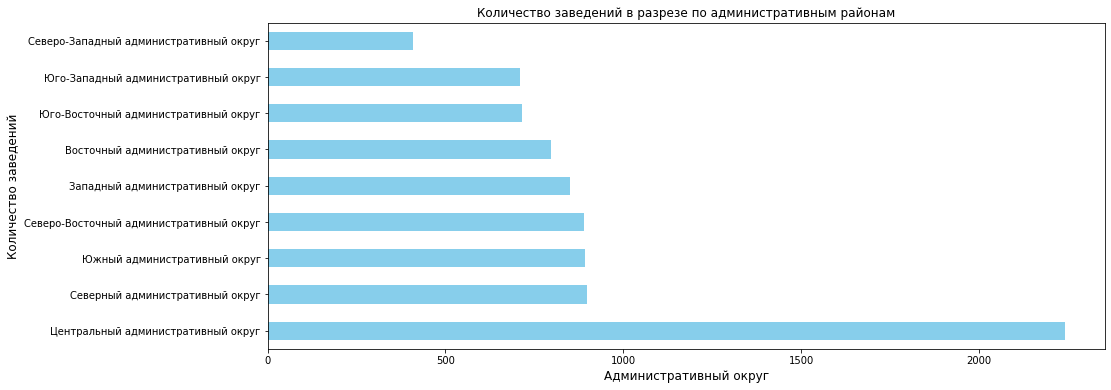

In [25]:
location_count = df.groupby('district')['id'].agg('count').sort_values(ascending = False)
location_count.plot(kind = 'barh',
        title = 'Количество заведений в разрезе по административным районам',
        xlabel = 'district',
        ylabel = 'location_count',
        rot = 0,
        figsize = (15, 6),
        color = 'skyblue',
        legend = False
)
plt.xlabel('Административный округ', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.show()

Анализ показывает неравномерное распределение заведений общественного питания по административным округам Москвы. 
 - Наибольшая концентрация заведений наблюдается в Центральном административном округе, что объясняется его историческим статусом, туристической привлекательностью и высокой деловой активностью.
 - Южный и Юго-Западный округа также демонстрируют значительное количество заведений, что связано с высокой плотностью населения и развитой инфраструктурой этих районов.
 - Северные и Восточные округа имеют относительно меньшее количество заведений, что может быть обусловлено меньшей плотностью застройки и особенностями планировочной структуры этих районов.

In [26]:
cao_data = df[df['district'] == 'Центральный административный округ'].copy()
category_stats = cao_data['category'].value_counts().reset_index()
category_stats.columns = ['category', 'count']
category_stats['proportion'] = (category_stats['count'] / len(df)).round(6)

# Красивое отображение таблицы
print("Распределение заведений по Центральному округу:")
print(category_stats.to_string(index=False))

Распределение заведений по Центральному округу:
       category  count  proportion
       ресторан    670    0.079743
           кафе    464    0.055225
        кофейня    428    0.050940
        бар,паб    364    0.043323
       пиццерия    113    0.013449
быстрое питание     87    0.010355
       столовая     66    0.007855
       булочная     50    0.005951


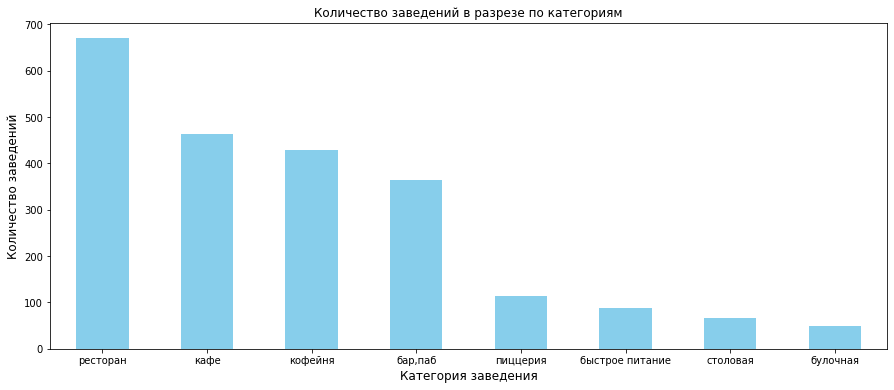

In [27]:
cao_data = df[df['district'] == 'Центральный административный округ'].copy()
cao_category_count = cao_data.groupby('category')['id'].agg('count').sort_values(ascending = False)
cao_category_count.plot(kind = 'bar',
        title = 'Количество заведений в разрезе по категориям',
        xlabel = 'category',
        ylabel = 'cao_category_count',
        rot = 0,
        figsize = (15, 6),
        color = 'skyblue',
        legend = False
)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.show()


 - Центральный округ демонстрирует премиальную структуру заведений общественного питания. Доминируют рестораны (8%), что отражает высокий уровень ценовой политики и ориентированность на туристический и бизнес-трафик.

 - Значительную долю занимают кафе (5.5%) и кофейни (5.1%), что соответствует современным трендам питания в центре города. Высокая доля баров и пабов (4.3%) подчеркивает развитую ночную жизнь и развлекательную инфраструктуру округа.

 - Бюджетные форматы (столовые - 0.8%, булочные - 0.6%) представлены минимально, что подтверждает элитный характер гастрономического рынка в центре Москвы.

---

### Задача 3

Изучаем соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения

([<matplotlib.axis.XTick at 0x7f35b231a1c0>,
 [Text(0, 0, 'Несетевые'), Text(1, 0, 'Сетевые')])

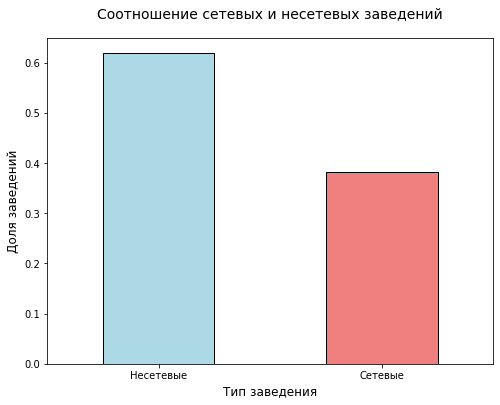

In [28]:
chain_proportions = df['chain'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
chain_proportions.plot(kind='bar', 
                      color=['lightblue', 'lightcoral'],
                      edgecolor='black')

plt.title('Соотношение сетевых и несетевых заведений', fontsize=14, pad=20)
plt.xlabel('Тип заведения', fontsize=12)
plt.ylabel('Доля заведений', fontsize=12)
plt.xticks([0, 1], ['Несетевые', 'Сетевые'], rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'булочная'),
  Text(1, 0, 'пиццерия'),
  Text(2, 0, 'кофейня'),
  Text(3, 0, 'быстрое питание'),
  Text(4, 0, 'ресторан'),
  Text(5, 0, 'кафе'),
  Text(6, 0, 'столовая'),
  Text(7, 0, 'бар,паб')])

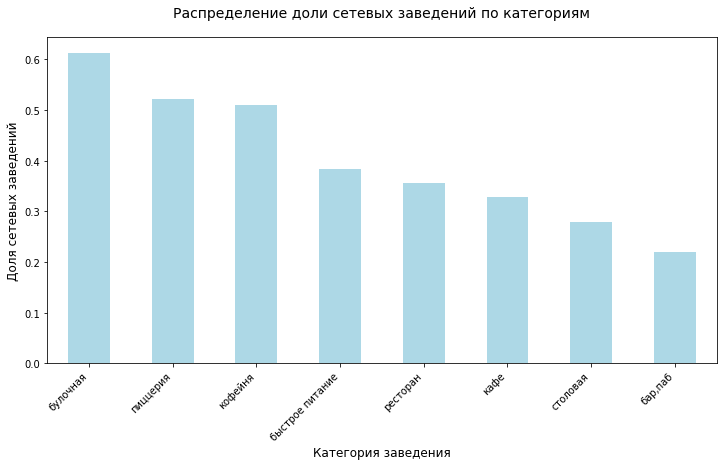

In [29]:
chain_by_category = df.groupby('category')['chain'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
chain_by_category.plot(kind='bar', color='lightblue')

plt.title('Распределение доли сетевых заведений по категориям', fontsize=14, pad=20)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Доля сетевых заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')

 - Наибольшая доля сетевых заведений наблюдается в категориях "кофейня" и "пиццерия" (около 50-60%), что свидетельствует о высокой степени стандартизации и масштабируемости этих форматов.

 - Категории "ресторан" и "кафе" демонстрируют средние показатели (30-40%), отражая смешанную структуру рынка с присутствием как сетевых, так и независимых заведений.

 - Наименьшая доля сетевого формата характерна для "столовых" и "булочных" (менее 20%), что объясняется локальным характером этих заведений и меньшими возможностями для масштабирования.

---

### Задача 4

Исследуем количество посадочных мест в заведениях


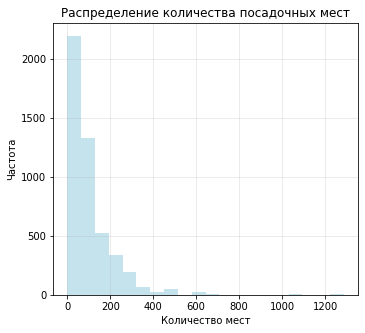

In [30]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['seats'].dropna(), bins=20, color='lightblue', alpha=0.7)
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест')
plt.ylabel('Частота')
plt.grid(alpha=0.3)

<Figure size 864x1080 with 0 Axes>

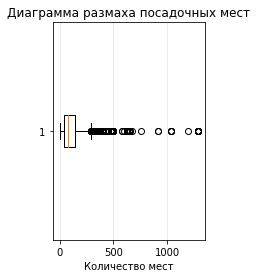

<Figure size 864x1080 with 0 Axes>

In [31]:
plt.subplot(1, 2, 2)
plt.boxplot(df['seats'].dropna(), vert=False)
plt.title('Диаграмма размаха посадочных мест')
plt.xlabel('Количество мест')
plt.grid(axis='x', alpha=0.3)
plt.figure(figsize=(12, 15))

Text(0, 0.5, 'Количество посадочных мест')

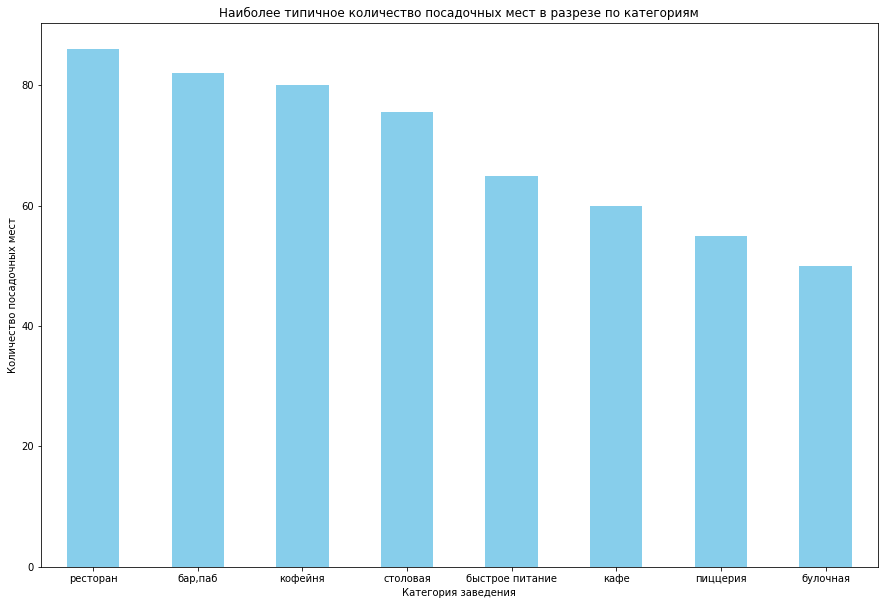

In [32]:
typical_seats = df.groupby('category')['seats'].median().sort_values(ascending=False)
typical_seats.plot(kind = 'bar',
                    title = 'Наиболее типичное количество посадочных мест в разрезе по категориям',
                   legend = False,
                   rot = 0,
                   xlabel = 'category',
                   ylabel = 'typical_seart',
                   figsize = (15, 10),
                   color = 'skyblue'
                  )
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')

In [33]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]
outliers_by_category = {}
for category in df['category'].unique():
    category_data = df[df['category'] == category]['seats'].dropna()
    outliers = detect_outliers_iqr(category_data)
    if not outliers.empty:
        outliers_by_category[category] = outliers

print("Выбросы по категориям:")
for category, outliers in outliers_by_category.items():
    print(f"{category}: {len(outliers)} выбросов")

Выбросы по категориям:
кафе: 98 выбросов
ресторан: 77 выбросов
кофейня: 40 выбросов
пиццерия: 27 выбросов
бар,паб: 44 выбросов
быстрое питание: 14 выбросов
булочная: 11 выбросов
столовая: 13 выбросов


Выбросы встречаются во всех категориях заведений, однако их количество существенно разнится:
   - Больше всего выбросов встречается в категории "ресторан". Это может быть связано с размерами заведений и особенностями интерьера.
   - Остальные категории показывают схожую картину, причина возникновений выбросов у них вероятно такая же.

---

### Задача 5

Исследуем рейтинг заведений.

In [34]:
df['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

In [35]:
df.groupby('category')['rating'].agg('describe').sort_values(by = 'category', ascending = False)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0
ресторан,2042.0,4.290402,0.413143,1.0,4.2,4.3,4.5,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
кафе,2376.0,4.124285,0.566001,1.0,4.0,4.2,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
булочная,256.0,4.268359,0.386303,1.3,4.2,4.3,4.4,5.0
"бар,паб",764.0,4.387696,0.380392,1.1,4.3,4.4,4.6,5.0


Text(0, 0.5, 'Усредненный рейтинг')

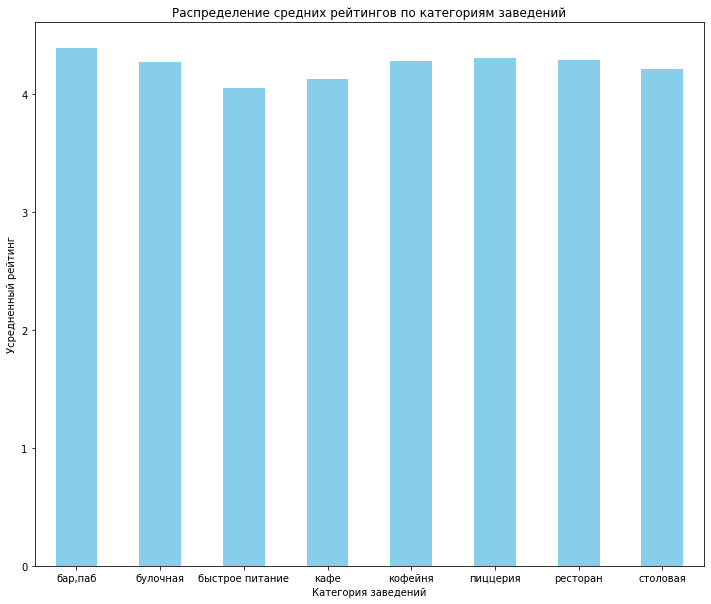

In [36]:
category_rating = df.groupby('category')['rating'].agg('mean')
category_rating.plot(kind = 'bar',
                    title = 'Распределение средних рейтингов по категориям заведений',
                    legend = False,
                    rot = 0,
                     xlabel = 'category',
                     ylabel = 'category_rating',
                     figsize = (12, 10),
                     color = 'skyblue'
)
plt.xlabel('Категория заведений')
plt.ylabel('Усредненный рейтинг')

В целом, усредненные рейтинги в разрере по категориям показывают примерно равные значения для каждого типа заведения

---

### Задача 6

Изучаем, с какими данными показывают самую сильную корреляцию рейтинги заведений?

interval columns not set, guessing: ['rating', 'chain', 'seats']


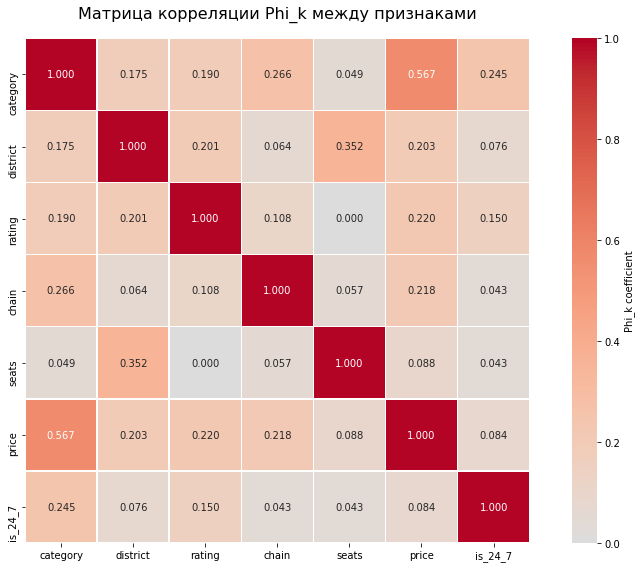

In [37]:
columns_to_analyze = ['category', 'district', 'rating', 'chain', 'seats', 'price', 'is_24_7']
df_phik = df[columns_to_analyze].copy()

# Вычисляем матрицу корреляции phi_k
phik_matrix = df_phik.phik_matrix()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Phi_k coefficient'})

plt.title('Матрица корреляции Phi_k между признаками', fontsize=16, pad=20)
plt.tight_layout()

In [38]:
correlation_columns = ['rating', 'price', 'category', 'district', 'is_24_7', 'chain', 'seats']

phik_matrix = df[correlation_columns].phik_matrix()

rating_correlations = phik_matrix['rating'].drop('rating').sort_values(ascending=False)

correlation_table = pd.DataFrame({
    'Признак': rating_correlations.index,
    'Корреляция с рейтингом': rating_correlations.values
}).reset_index(drop=True)
display(correlation_table)

interval columns not set, guessing: ['rating', 'chain', 'seats']


,Признак,Корреляция с рейтингом
0,price,0.220295
1,district,0.200761
2,category,0.189716
3,is_24_7,0.150365
4,chain,0.107833
5,seats,0.000000


In [39]:
df.groupby('price')['rating'].agg('mean').sort_values(ascending = True)

price
низкие           4.173077
средние          4.297874
выше среднего    4.386348
высокие          4.436611
Name: rating, dtype: float64

Text(0, 0.5, 'Рейтинг')

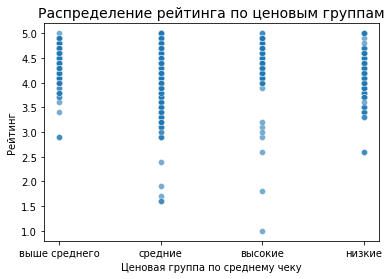

In [40]:
sns.scatterplot(data=df, x='price', y='rating', alpha=0.6)
plt.title('Распределение рейтинга по ценовым группам', fontsize=14)
plt.xlabel('Ценовая группа по среднему чеку')
plt.ylabel('Рейтинг')

In [41]:
price_rating_stats = df.groupby('price')['rating'].agg(['mean', 'count', 'std']).round(3).sort_values('mean', ascending=True)
display(price_rating_stats)

,mean,count,std
price,,,
низкие,4.173,156,0.373
средние,4.298,2117,0.296
выше среднего,4.386,564,0.224
высокие,4.437,478,0.314


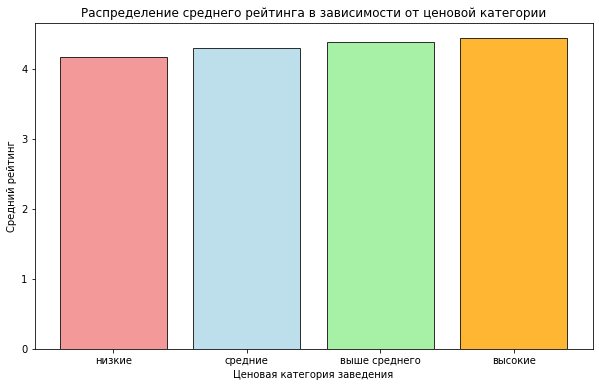

In [42]:
plt.figure(figsize=(10, 6))
bars = plt.bar(price_rating_stats.index, price_rating_stats['mean'], 
               color=['lightcoral', 'lightblue', 'lightgreen', 'orange'],
               alpha=0.8, edgecolor='black')
plt.xlabel('Ценовая категория заведения')
plt.ylabel('Средний рейтинг')
plt.title('Распределение среднего рейтинга в зависимости от ценовой категории')
plt.show()

Анализ выявил устойчивую положительную корреляцию между ценовой категорией заведений и их рейтингом (коэффициент корреляции 0,220). Наблюдается четкая тенденция: чем выше ценовая категория заведения, тем выше средний рейтинг.

Ключевые закономерности:

 - Заведения с высокими ценами демонстрируют наивысший средний рейтинг (4,437)

 - Заведения категории "выше среднего" следуют за ними с показателем 4,386

 - Средний ценовой сегмент показывает рейтинг 4,298

 - Заведения с низкими ценами имеют наименьший средний рейтинг (4,173)

---

### Задача 7

Топ-15 популярных сетевых заведений Москвы

In [43]:
chain_df = df[df['chain'] == 1].copy()

# 2. Группируем по названию и категории, считаем количество заведений и средний рейтинг
top_chains = chain_df.groupby(['name', 'category']).agg(
    chain_count=('chain', 'count'),      # количество заведений сети
    avg_rating=('rating', 'mean')        # средний рейтинг
).reset_index()
top_15_chains = top_chains.nlargest(15, 'chain_count')
display(top_15_chains)

,name,category,chain_count,avg_rating
1142,Шоколадница,кофейня,119,4.178151
504,Домино'с Пицца,пиццерия,76,4.169737
497,Додо Пицца,пиццерия,74,4.286486
206,One Price Coffee,кофейня,71,4.064789
1158,Яндекс Лавка,ресторан,69,3.872464
73,Cofix,кофейня,65,4.075385
242,Prime,ресторан,49,4.114286
558,КОФЕПОРТ,кофейня,42,4.147619
644,Кулинарная лавка братьев Караваевых,кафе,39,4.394872
978,Теремок,ресторан,36,4.105556


<BarContainer object of 15 artists>

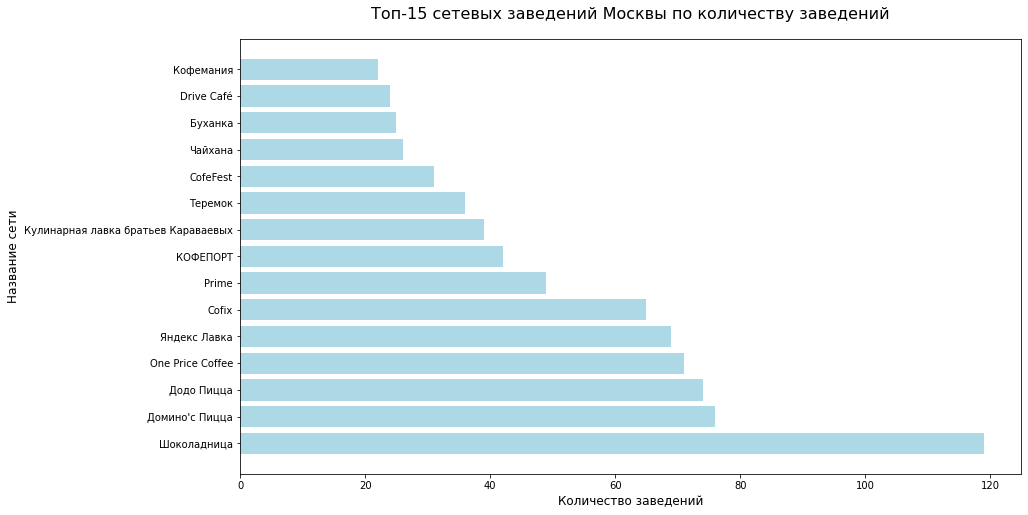

In [44]:
plt.figure(figsize=(14, 8))

# Создаем горизонтальный барплот
bars = plt.barh(top_15_chains['name'], top_15_chains['chain_count'], 
                color='lightblue')

plt.title('Топ-15 сетевых заведений Москвы по количеству заведений', fontsize=16, pad=20)
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Название сети', fontsize=12)
display(bars)

Text(0, 0.5, 'Название сети')

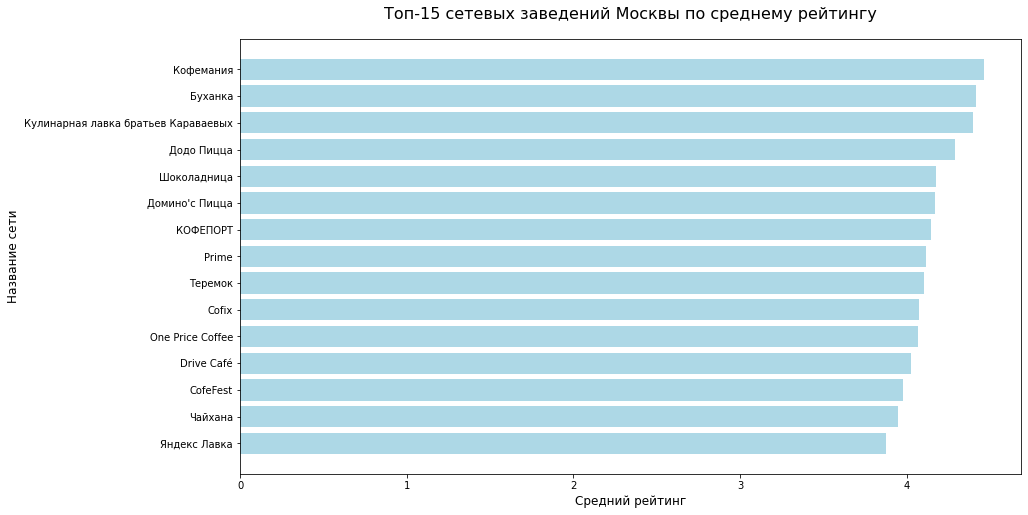

In [45]:
plt.figure(figsize=(14, 8))
top_15_sorted = top_15_chains.sort_values('avg_rating', ascending=True)
# Создаем горизонтальный барплот
bars = plt.barh(top_15_sorted['name'], top_15_sorted['avg_rating'], 
                color='lightblue')

plt.title('Топ-15 сетевых заведений Москвы по среднему рейтингу', fontsize=16, pad=20)
plt.xlabel('Средний рейтинг', fontsize=12)
plt.ylabel('Название сети', fontsize=12)

 - Лидеры по количеству заведений: Крупнейшими сетевыми компаниями являются кофейни «Шоколадница» (119) и пиццерии «Домино'с Пицца» (76) и «Додо Пицца» (74).

 - Самые высокие рейтинги: Наивысший средний рейтинг у булочной «Буханка» (4.416) и кофейни «Кофемания» (4.464). При этом «Кофемания» имеет значительно меньше точек, чем лидеры рынка.

 - Кофейни доминируют: Кофейни представлены наибольшим количеством сетей в топ-15, что указывает на высокую конкуренцию и популярность этого формата.

 - Зависимость рейтинга от размера сети: Крупнейшие сети («Шоколадница», «Домино'с», «Яндекс Лавка») демонстрируют средний рейтинг, в то время как более мелкие сети часто показывают более высокие оценки («Буханка», «Кофемания», «Кулинарная лавка»). Это может говорить о том, что поддерживать высокое качество при массовом масштабировании сложнее.

---

### Задача 8

Изучаем вариацию среднего чека заведения

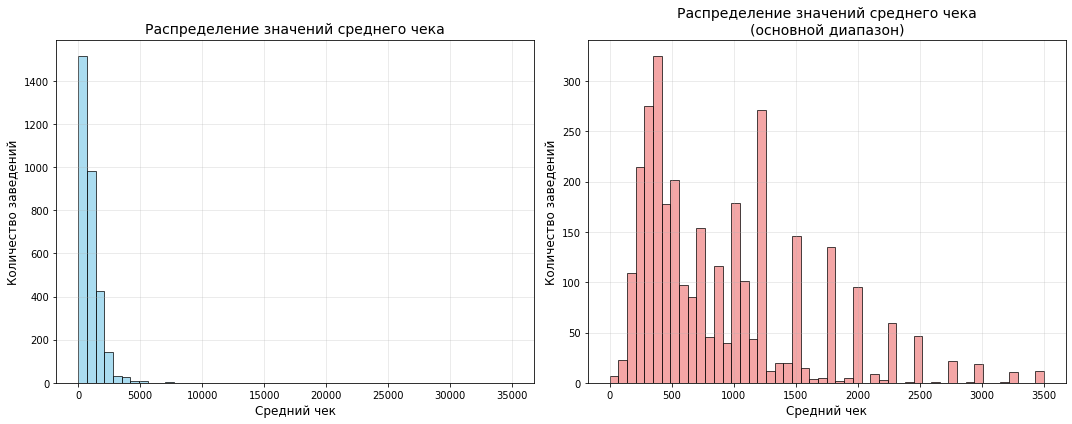

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Первая гистограмма - полное распределение
axes[0].hist(df['middle_avg_bill'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Распределение значений среднего чека', fontsize=14)
axes[0].set_xlabel('Средний чек', fontsize=12)
axes[0].set_ylabel('Количество заведений', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Вторая гистограмма - увеличенный вид основного диапазона цен
# Фильтруем данные для отображения основного диапазона (исключаем крайние выбросы)
main_range_data = df[(df['middle_avg_bill'] >= 0) & 
                                (df['middle_avg_bill'] <= 3500)]

axes[1].hist(main_range_data['middle_avg_bill'], bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1].set_title('Распределение значений среднего чека\n(основной диапазон)', fontsize=14)
axes[1].set_xlabel('Средний чек', fontsize=12)
axes[1].set_ylabel('Количество заведений', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Настраиваем layout и отображаем графики
plt.tight_layout()
plt.show()

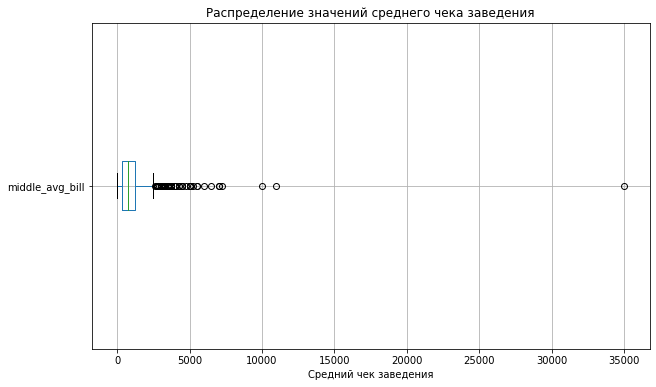

In [47]:
plt.figure(figsize=(10, 6))
df[df['middle_avg_bill']!= -1].boxplot(column='middle_avg_bill',vert=False)
plt.xlabel('Средний чек заведения')
plt.title('Распределение значений среднего чека заведения')
plt.show()

In [48]:
df.groupby('district')['middle_avg_bill'].agg(['median', 'mean'])

,median,mean
district,,
Восточный административный округ,575.0,820.626923
Западный административный округ,1000.0,1053.225490
Северный административный округ,650.0,927.959627
Северо-Восточный административный округ,500.0,716.611296
Северо-Западный административный округ,700.0,822.222930
Центральный административный округ,1000.0,1191.057547
Юго-Восточный административный округ,450.0,654.097938
Юго-Западный административный округ,600.0,792.561702
Южный административный округ,500.0,834.398089


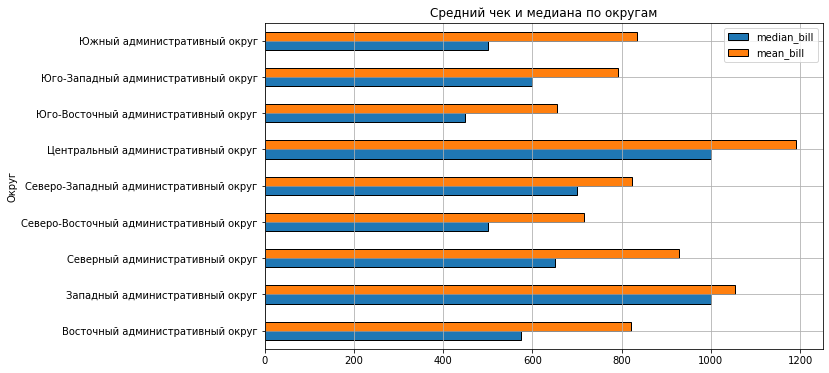

In [49]:
df.groupby('district').agg( median_bill=('middle_avg_bill', 'median'),mean_bill=('middle_avg_bill', 'mean')).plot(kind='barh',rot=0,edgecolor='black',
                                   title='Средний чек и медиана по округам',
                                   ylabel='Средний чек, медиана',
                                   xlabel='Округ',
                                   grid=True,
                                   figsize=(10,6))
plt.show()

Исходя из графиков можно сделать вывод, что медианный средний чек в большинстве округов заметно ниже, нежели в Центральном административным округом

 - Центральный административный округ: Высокие значения среднего чека могут быть связаны с большим количеством премиальных заведений.
 - Западный административный округ: Также имеет высокие значения среднего чека, что может быть связано с развитой инфраструктурой и высоким уровнем жизни.
 - Южный административный округ: Низкие значения среднего чека могут быть связаны с меньшей концентрацией премиальных заведений и более демократичными ценами.
 - В некоторых округах, таких как Восточный административный округ, Северный административный округ, Южный административный округ заметна большая разница между средним значением и медианой, что говорит о выбросах и подтверждается построенным "ящиком с усами".

---


---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

1. Распределение заведений по категориям и округам

 - Категории заведений: Наибольшее количество заведений приходится на категории "ресторан", "бар/паб" и "кофейня". Это подтверждается как табличными данными, так и графиками распределения.
 - Округа: Центральный административный округ лидирует по количеству заведений, что логично с точки зрения туристической и деловой активности.

2. Посадочные места

 - Типичное количество посадочных мест: Рестораны имеют наибольшее количество посадочных мест, а булочные — наименьшее. Это соответствует специфике форматов заведений.
 - Распределение: Большинство заведений имеют от 0 до 200 посадочных мест, что характерно для небольших кафе и кофеен.

3. Рейтинги заведений

 - Средние рейтинги: Заведения категорий "бар/паб" и "кофейня" имеют наивысшие средние рейтинги, что может быть связано с высокой конкуренцией и качеством обслуживания.
 - Топ сетевых заведений по рейтингу: Сети "Буханка", "Кулинария лавка братьев Караваевых" и "Кофемания" имеют одни из самых высоких средних рейтингов.

4. Средний чек

 - Распределение значений среднего чека: Большинство значений среднего чека сосредоточены в диапазоне от 0 до 5000 рублей, с основным диапазоном от 500 до 1500 рублей.
 - Основной диапазон: На графике распределения значений среднего чека видно, что основная масса заведений имеет средний чек в пределах 500-1500 рублей.
 - Выбросы: На графике с усами (boxplot) видны значительные выбросы, что может свидетельствовать о наличии премиальных заведений с высоким средним чеком.

5. Корреляция признаков

 - Матрица корреляции: Выявлена статистически значимая положительная корреляция между ценовой категорией и рейтингом (0,220)

6. Сравнение медианы и среднего чека по округам

 - Центральный административный округ: Имеет самое высокое значение среднего чека, что может быть связано с высокой концентрацией премиальных заведений.
 - Южный административный округ: Имеет наименьшие значения среднего чека, что может быть связано с меньшей концентрацией премиальных заведений и более демократичными ценами.

7. Топ сетевых заведений

 - Количество заведений: "Шоколадница" является крупнейшей сетью с более чем 110 заведениями.
 - Рейтинг: Сети "Буханка" и "Кофемания" имеют одни из самых высоких средних рейтингов.

## 4. Итоговый вывод и рекомендации

### Цели и задачи проекта
Проведен комплексный исследовательский анализ рынка общественного питания Москвы для определения перспективных направлений инвестирования. Основные задачи включали изучение категорийной структуры заведений, географического распределения, сетевого присутствия, анализа посадочных мест, рейтинговой системы и ценовой политики.

### Основные результаты исследования
1. Структура рынка
 - Категорийное распределение: Доминируют кафе (28,3%), рестораны (24,3%) и кофейни (16,8%), что свидетельствует о разнообразии форматов питания в городе

 - Географическая концентрация: Центральный административный округ лидирует по количеству заведений (26,7%), что объясняется высокой деловой активностью и туристической привлекательностью

 2. Сетевое присутствие
 - Соотношение форматов: 60% заведений являются несетевыми, 40% - сетевыми

 - Наиболее "индустриализированные" категории: Кофейни и пиццерии демонстрируют наибольшую долю сетевых заведений (50-60%), что указывает на хорошую масштабируемость этих форматов

 3. Анализ вместимости
 - Типичная вместимость: Рестораны имеют наибольшее количество посадочных мест (медиана - 60 мест), булочные - наименьшее (медиана - 10 мест)

 - Выбросы: Обнаружены во всех категориях, наиболее значительные - в категории "ресторан", что может быть связано с заведениями в крупных торгово-развлекательных комплексах

 4. Рейтинги заведений
 - Средние показатели: Общий средний рейтинг по Москве составляет 4,23 из 5,0

 - Лидеры по категориям: Бары/пабы (4,39) и пиццерии (4,30) демонстрируют наивысшие средние рейтинги

 - Корреляционный анализ: Выявлена статистически значимая положительная корреляция между ценовой категорией и рейтингом (0,220)

 - Ценовая зависимость: Заведения с высокими ценами показывают наивысший рейтинг (4,437), низкие цены ассоциированы с более низкими оценками (4,173)

 5. Ценовой анализ
 - Средний чек: Основная масса заведений имеет средний чек в диапазоне 500-1500 рублей

 - Географическая дифференциация: Центральный округ показывает значительно более высокие ценовые показатели (медиана - 1000 рублей) по сравнению с периферийными округами

 - Ценовые outliers: Обнаружены премиальные заведения с чеком свыше 5000 рублей, преимущественно в ЦАО

6. Топ сетевых заведений
 - По количеству: Шоколадница (119 заведений), Домино'с Пицца (76), Додо Пицца (74)

 - По рейтингу: Буханка (4,42), Кофемания (4,46), Кулинарная лавка братьев Караваевых (4,39)

### Влияние предобработки данных на результаты
 - Проведенная предобработка, включая обработку пропусков (42% в данных о посадочных местах) и удаление дубликатов, обеспечила достоверность результатов. Учтена природа пропусков (MNAR, MAR), что позволило сохранить репрезентативность данных для анализа.

### Рекомендации для инвесторов
 - Приоритетный формат: Сетевая кофейня - оптимальное сочетание масштабируемости и потребительского спроса

 - Локация: ЦАО - для премиального позиционирования, другие округа - для демократичного формата

 - Ценовой сегмент: 400-500 рублей в ЦАО заполнит нишу между премиумом и бюджетными вариантами

 - Ценовая стратегия: Установление цен выше среднего может способствовать более высоким рейтингам

 - Операционная модель: Акцент на технологичность обслуживания для повышения рейтингов